In [1]:
import platform

In [2]:
if platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/drive')

In [3]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
if platform.system() == 'Linux':
  df = pd.read_csv('/content/drive/MyDrive/deep learning/pytorch_course/PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')
else:
  df = pd.read_csv('../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64


### It's more useful as a feature calculate the distance of the trip that the longitude and latitude
#### so here we use the haversine formula to calculate the distance

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{split} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{split}$


https://en.wikipedia.org/wiki/Haversine_formula


In [7]:
def haversine_distance (df, lat1, long1, lat2, long2):
    r = 6371

    subs_latitude = np.radians(df[lat2]-df[lat1])
    sum_latitude = np.radians(df[lat2]+df[lat1])
    subs_long = np.radians(df[long2]-df[long1])

    d = np.sin(subs_latitude/2)**2+( (1-(np.sin(subs_latitude/2)**2)) - (np.sin(sum_latitude/2)**2)) * (np.sin(subs_long/2)**2)
    d = np.arcsin(np.sqrt(d)) * (2*r)

    return d

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [9]:
# This calculate the distance using haversine_distance and add it as a new column to the dataset
df['dist_km'] = haversine_distance(df, 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [11]:
# convert to a pandas datatime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [12]:
my_time = df['pickup_datetime'][0]

In [13]:
# adapt to newyork hour
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [14]:
# create the column for the hour
df['Hour'] = df['EDTdate'].dt.hour

In [15]:
# create the column for am or pm
df['AMorPM'] = np.where(df['Hour']<12, 'am', 'pm')

In [16]:
# create the column for the weekday
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764,2010-04-16 22:19:01+00:00,22,pm,Fri


## Categorical data

In [18]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']

### Use pandas to categorical columns

In [19]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

print(df['Hour'].head())
print(df['AMorPM'].head())
print(df['Weekday'].head())


0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]
0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']
0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']


In [20]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [21]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [22]:
cats = np.stack([hr, ampm, wkdy], axis=1)
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [23]:
# we can do this in one line

# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [24]:
cats = torch.tensor(cats, dtype=torch.int64)

In [25]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)

In [26]:
y = torch.tensor(df[y_col].values).flatten()
y

tensor([0, 0, 1,  ..., 1, 0, 0])

### Set the embedding size

In [27]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
cat_szs

[24, 2, 7]

In [28]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

## Code the tabular model

In [29]:
catz = cats[:3]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2]])

In [30]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

## Forward method
This is the forward method that we will be executing in the forward mehtod of our model

So here is giving values to the one hot encodings that we have create. 

**Each array is from one value of a feature from the categorical data**

In [31]:
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

embeddingz

[tensor([[-2.1240, -1.7385, -0.5054, -0.2915,  0.2422, -0.2113,  0.1915, -0.1054,
          -1.5466, -1.0246,  0.6067,  1.7605],
         [ 0.8663,  1.1271, -1.3287,  2.3773, -0.9289, -2.1014,  1.1766,  0.3844,
          -0.1413,  0.3801,  0.0939, -0.9803],
         [ 0.0280, -0.2201, -0.5799,  0.7315, -0.8975,  1.0110, -0.7192, -0.8311,
           0.2850, -1.5620, -2.2751,  0.0297]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.6100],
         [-1.6100],
         [-1.6100]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.5121, -0.1467, -1.1574,  0.9418],
         [-0.6608, -0.4619, -0.4130, -0.1722],
         [-0.6608, -0.4619, -0.4130, -0.1722]], grad_fn=<EmbeddingBackward>)]

### Here it concatenate the first array with the first one and the second with the second one

In [32]:
z = torch.cat(embeddingz, 1)
z

tensor([[-2.1240, -1.7385, -0.5054, -0.2915,  0.2422, -0.2113,  0.1915, -0.1054,
         -1.5466, -1.0246,  0.6067,  1.7605, -1.6100, -0.5121, -0.1467, -1.1574,
          0.9418],
        [ 0.8663,  1.1271, -1.3287,  2.3773, -0.9289, -2.1014,  1.1766,  0.3844,
         -0.1413,  0.3801,  0.0939, -0.9803, -1.6100, -0.6608, -0.4619, -0.4130,
         -0.1722],
        [ 0.0280, -0.2201, -0.5799,  0.7315, -0.8975,  1.0110, -0.7192, -0.8311,
          0.2850, -1.5620, -2.2751,  0.0297, -1.6100, -0.6608, -0.4619, -0.4130,
         -0.1722]], grad_fn=<CatBackward>)

In [33]:
selfembdrop = nn.Dropout(0.4)

In [34]:
z = selfembdrop(z)
z

tensor([[-3.5400, -2.8974, -0.0000, -0.0000,  0.4037, -0.3522,  0.3191, -0.0000,
         -2.5777, -1.7077,  1.0112,  2.9342, -2.6834, -0.0000, -0.2446, -1.9289,
          0.0000],
        [ 0.0000,  0.0000, -2.2145,  3.9622, -1.5481, -0.0000,  1.9610,  0.6407,
         -0.0000,  0.6336,  0.0000, -0.0000, -0.0000, -0.0000, -0.7698, -0.6884,
         -0.0000],
        [ 0.0000, -0.0000, -0.0000,  0.0000, -0.0000,  0.0000, -1.1987, -0.0000,
          0.4750, -0.0000, -0.0000,  0.0494, -0.0000, -0.0000, -0.0000, -0.6884,
         -0.2871]], grad_fn=<MulBackward0>)

## Here is a graphical view of the model

<img src="../../boards/tabular_regresion_model.png" width="400" heigth="400">

The value of layers it could be this:

`layer = [200, 100, 50]`

Each value is th num of neurons i our model and the len of the list the num of layers


In [35]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()

        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []

        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)

        return x

# Train the model

In [36]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4)

In [37]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [40]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size: batch_size]
cont_train = conts[:batch_size-test_size]
cont_test = conts[batch_size-test_size: batch_size]

y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size: batch_size]

In [41]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, cont_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.81329125


KeyboardInterrupt: 

Text(0, 0.5, 'Epochs')

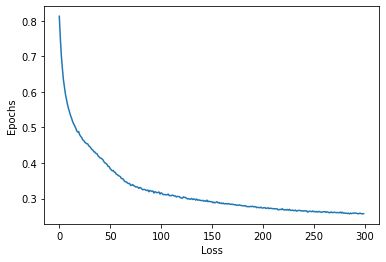

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('Epochs')

In [ ]:
# save of colab
if platform.system() == 'Linux':
  torch.save(model.state_dict(), '/content/drive/MyDrive/deep learning/pytorch_course/my files/rna/TaxiModelClassification.pt')
else:
  torch.save(model.state_dict(), 'TaxiModelClassification.pt')

In [50]:
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4)

# load the model
if platform.system() == 'Linux':
  model.load_state_dict(torch.load('/content/drive/MyDrive/deep learning/pytorch_course/my files/rna/TaxiModelClassification.pt'))
else:
  model.load_state_dict(torch.load('TaxiModelClassification.pt'))


In [51]:
with torch.no_grad():
    y_val = model(cat_test, cont_test)

    loss = torch.sqrt(criterion(y_val, y_test))
    print(loss)

tensor(0.5068)


In [70]:
correct = 0
num_of_obs = 50

for i in range(num_of_obs):
    print(f'Predicted: {y_val[i].argmax():8.2f}   Real: {y_test[i]:8.2f}')

    if y_val[i].argmax() == y_test[i]:
        correct += 1

print(correct)
accuracy = correct / num_of_obs * 100
print(f'The accuracy is {accuracy} %')

Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
Predicted:     1.00   Real:     1.00
Predicted:     1.00   Real:     1.00
Predicted:     1.00   Real:     1.00
Predicted:     1.00   Real:     1.00
Predicted:     1.00   Real:     1.00
Predicted:     0.00   Real:     0.00
Predicted:     0.00   Real:     0.00
P